# *CUSTOMER CHURN RATE PREDICTION*

#### *Customer churn rate is the percentage of your customers or subscribers who cancel or don't renew their subscriptions during a given time period, such as a month or a year.*

##### Practice of analyzing data to detect customers who are likely to cancel their subscriptions help business to improve quality service and keep customer loyalty

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, import data and have a look

In [88]:
df = pd.read_csv("teleCust1000t.csv")

In [89]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Next, prepare for the training and testing data set

In [90]:
train = df.copy()
test = df.pop("custcat")

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3)

And then, standalizing the data

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

Create the KNN model prediction

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [96]:
model = KNeighborsClassifier()

Fit the model with training dataset

In [97]:
model.fit(x_train, y_train)

KNeighborsClassifier()

Use different value of n_neighbors to find out the best fit for model

In [98]:
n = 11
accuracy = []
for x in range(1,n):
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    acc = accuracy_score(y_test,prediction)
    accuracy.append(acc)


As we can see, the best value of n is 9

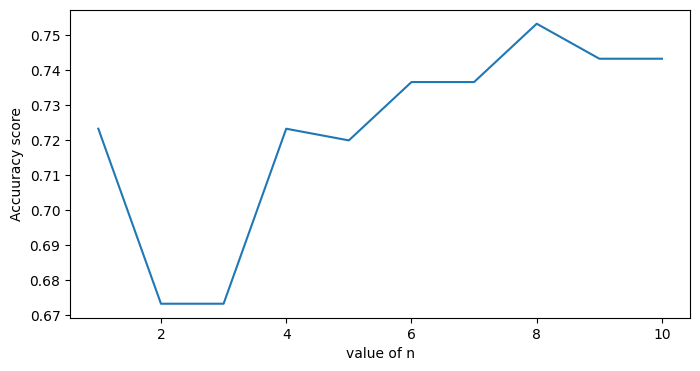

In [99]:
plt.figure(figsize=(8,4))

plt.plot(range(1,n),accuracy)

plt.xlabel("value of n")
plt.ylabel("Accuuracy score")

plt.show()